# Housing Price Prediction

### Problem Statement

### Business Goal 

### Importing Libraries

In [1]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

# for saving & loading model
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df1=pd.read_csv(r'D:\DATATRAINED\Internship-FlipnRobo\Projects by FlipnRobo\Project 3\Project-Housing_splitted\train.csv')
df2=pd.read_csv(r'D:\DATATRAINED\Internship-FlipnRobo\Projects by FlipnRobo\Project 3\Project-Housing_splitted\test.csv')

In [3]:
df1.head() # to display top 5 rows from train dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df2.head() # to display top 5 rows from test dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
print('Total no of rows & columns: ',df1.shape) # to display number of rows & columns from train data

Total no of rows & columns:  (1168, 81)


In [6]:
print('Total no of rows & columns: ',df2.shape) # to display number of rows & columns from test data

Total no of rows & columns:  (292, 80)


In [7]:
df1.info() # to know datatype of each columns in train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
df2.info() # to know datatype of each columns in test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [9]:
# to count number of unique values in each columns of train data
df1.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [10]:
# to count number of unique values in each columns of test data
df2.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 80, dtype: int64

In [11]:
# to list out categorical features from train dataset
cat_features=[i for i in df1.columns if df1.dtypes[i]=='object']
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
df1.describe().T # to get high understanding of dataset or to get overview/stats of the train dataset

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


1. LotFrontage,GarageYrBlt and MasVnrArea count is not same so there will be missing values in the train data..
2. Data is messed up for lots of variables as their standard deviation value is greater than their mean value.

In [13]:
df2.describe().T # to get high understanding of dataset or to get overview/stats of the test dataset

,count,mean,std,min,25%,50%,75%,max
Id,292.0,755.955479,442.565228,6.0,377.75,778.0,1152.25,1456.0
MSSubClass,292.0,57.414384,43.780649,20.0,20.00,50.0,70.00,190.0
LotFrontage,247.0,66.425101,21.726343,21.0,53.50,65.0,79.00,150.0
LotArea,292.0,10645.143836,13330.669795,1526.0,7200.00,9200.0,11658.75,215245.0
OverallQual,292.0,6.078767,1.356147,3.0,5.00,6.0,7.00,10.0
OverallCond,292.0,5.493151,1.063267,3.0,5.00,5.0,6.00,9.0
YearBuilt,292.0,1972.616438,30.447016,1872.0,1954.00,1976.0,2001.00,2009.0
YearRemodAdd,292.0,1985.294521,20.105792,1950.0,1968.00,1994.0,2003.25,2010.0
MasVnrArea,291.0,109.171821,175.030021,0.0,0.00,0.0,180.00,1031.0
BsmtFinSF1,292.0,439.294521,429.559675,0.0,0.00,369.5,700.50,1767.0


1. Count is not same for all variables so there will be missing values in the test data.
2. Data is messed up for variables like WoodDeckSF,2ndFlrSF,LotArea,LowQualFinSF etc as their standard deviation value is greater than their mean value. .

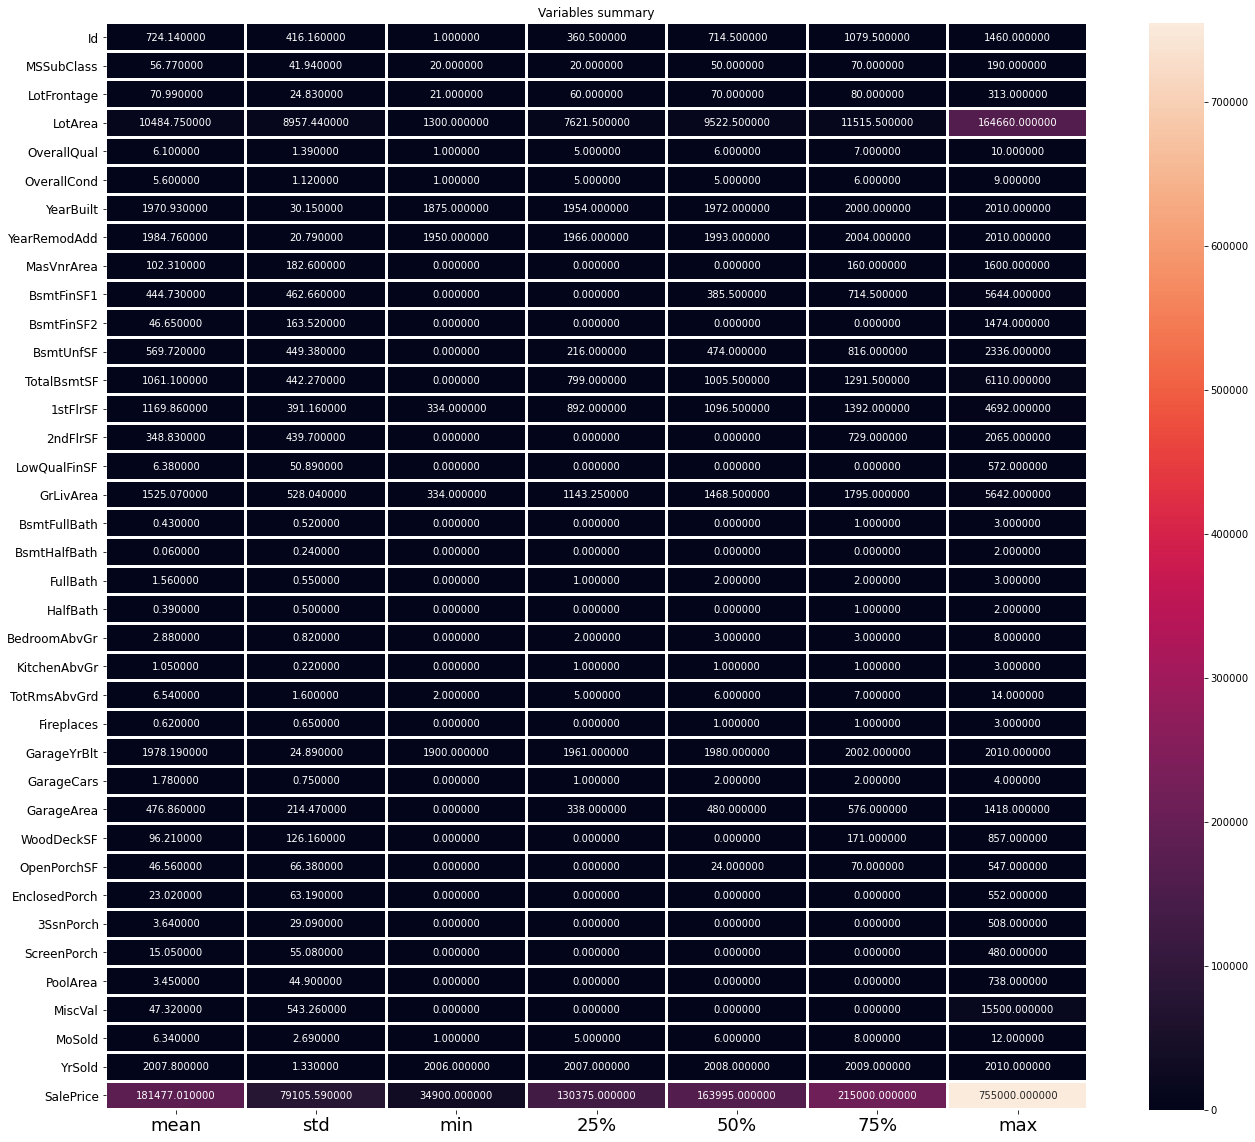

In [14]:
plt.figure(figsize=(22,20))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

#### From the above plotting we are determining mean, standard deviation, minimum and maximum values of each column. It helps us further in data cleaning.

<AxesSubplot:>

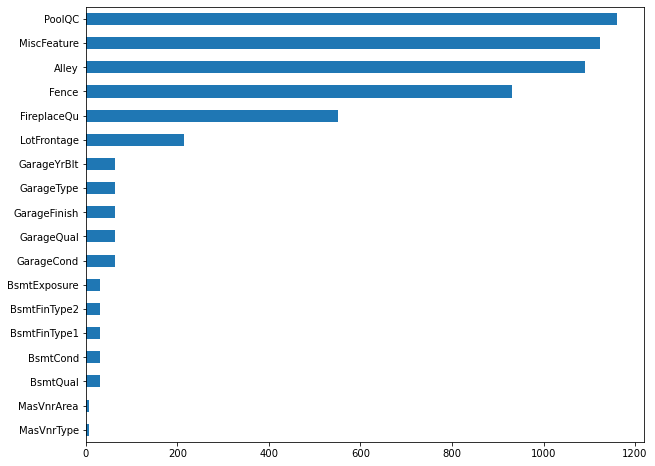

In [15]:
# to visualize variables having missing values from train data
fig, ax = plt.subplots(figsize=(10,8))
null = df1.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.barh(ax=ax)

<AxesSubplot:>

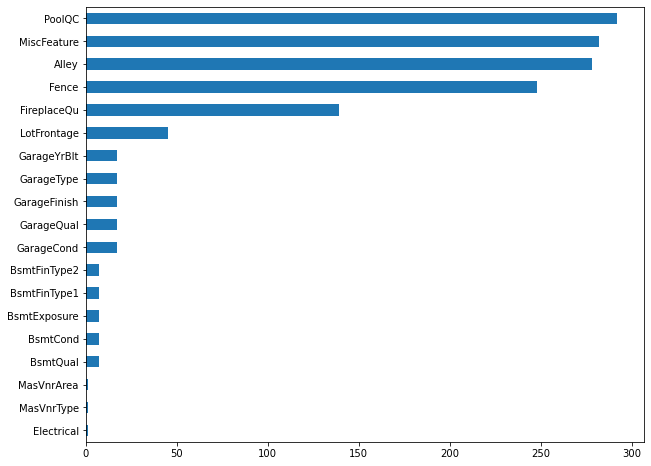

In [16]:
# to visualize features having null values from test data
fig, ax = plt.subplots(figsize=(10,8))
null = df2.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.barh(ax=ax)

In [17]:
# dropping variables having maximum % of null values from train & test data 
df1=df1.drop(columns=['PoolQC','Fence','MiscFeature','Alley'])
df2=df2.drop(columns=['PoolQC','Fence','MiscFeature','Alley'])

In [18]:
# Dropping 'GarageQual' column : Garage Quality & Garage Condition column represents same thing
df1=df1.drop(columns='GarageQual')
df2=df2.drop(columns='GarageQual')

In [19]:
# dropping columns as they are not useful for prediction
df1=df1.drop(columns=['Id','MiscVal','KitchenAbvGr','FireplaceQu'])
df2=df2.drop(columns=['Id','MiscVal','KitchenAbvGr','FireplaceQu'])

In [20]:
df1['Utilities'].unique()

array(['AllPub'], dtype=object)

#### Utilities feature in train data has one value throughout

In [21]:
df2['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

#### Utilities feature in test data has two value which is same as seen in bracket
AllPub- All public Utilities (E,G,W,& S)

NoSewr- Electricity, Gas, and Water (Septic Tank)

In [22]:
# dropping feature
df1=df1.drop(columns='Utilities')
df2=df2.drop(columns='Utilities')

In [23]:
df1['Condition1'].value_counts()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [24]:
df2['Condition2'].value_counts()

Norm    291
RRNn      1
Name: Condition2, dtype: int64

In [25]:
# dropping 'Condition2' column : categories are same like 'condition1' column and also has less categorical values  
df1=df1.drop(columns='Condition2')
df2=df2.drop(columns='Condition2')

In [26]:
# dropping 'Exterior2nd' column reason same as above 
df1=df1.drop(columns=['Exterior2nd','BsmtFinType2'])
df2=df2.drop(columns=['Exterior2nd','BsmtFinType2'])

In [27]:
# treating null values for train data : Using mode for categorical variables and median for continous variables
df1['BsmtCond']=df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])
df1['BsmtQual']=df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])
df1['BsmtExposure']=df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])
df1['GarageCond']=df1['GarageCond'].fillna(df1['GarageCond'].mode()[0])
df1['GarageFinish']=df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0])
df1['GarageType']=df1['GarageType'].fillna(df1['GarageType'].mode()[0])
df1['MasVnrType']=df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0])

df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].median())
df1['GarageYrBlt']=df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median())
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].median())

In [28]:
# treating null values for test data : Using mode for categorical variables and median for continous variables 
df2['BsmtCond']=df2['BsmtCond'].fillna(df2['BsmtCond'].mode()[0])
df2['BsmtQual']=df2['BsmtQual'].fillna(df2['BsmtQual'].mode()[0])
df2['BsmtExposure']=df2['BsmtExposure'].fillna(df2['BsmtExposure'].mode()[0])
df2['BsmtFinType1']=df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].mode()[0])
df2['GarageCond']=df2['GarageCond'].fillna(df2['GarageCond'].mode()[0])
df2['GarageFinish']=df2['GarageFinish'].fillna(df2['GarageFinish'].mode()[0])
df2['GarageType']=df2['GarageType'].fillna(df2['GarageType'].mode()[0])
df2['MasVnrType']=df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0])
df2['Electrical']=df2['Electrical'].fillna(df2['Electrical'].mode()[0])

df2['LotFrontage']=df2['LotFrontage'].fillna(df2['LotFrontage'].median())
df2['GarageYrBlt']=df2['GarageYrBlt'].fillna(df2['GarageYrBlt'].median())
df2['MasVnrArea']=df2['MasVnrArea'].fillna(df2['MasVnrArea'].median())

## Univariate Analysis

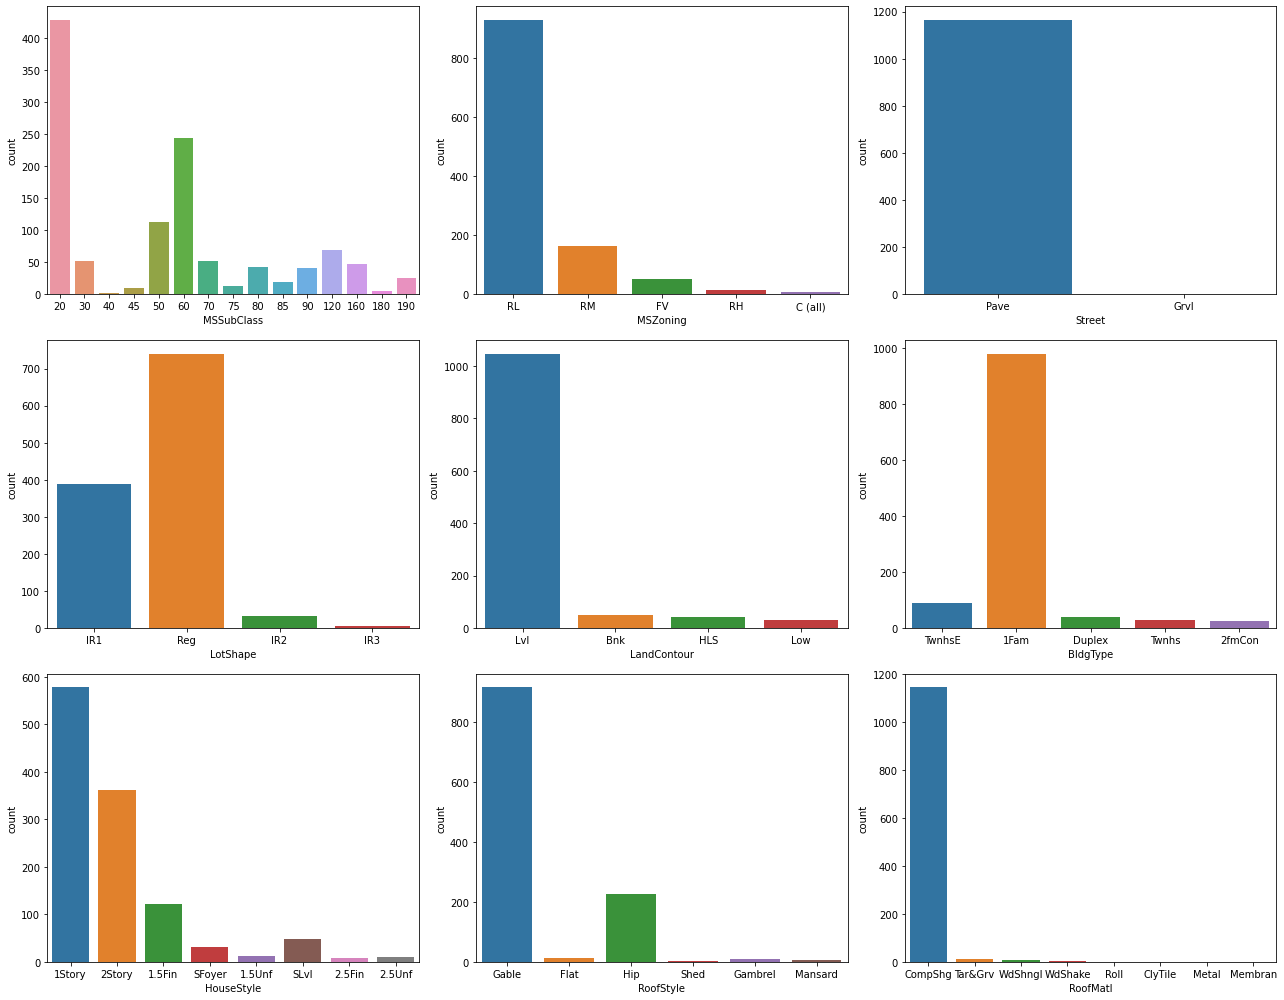

In [29]:
fig,ax = plt.subplots(3,3,figsize=(18,14))
sns.countplot('MSSubClass',data=df1,ax=ax[0][0])
sns.countplot('MSZoning',data=df1,ax=ax[0][1])
sns.countplot('Street',data=df1,ax=ax[0][2])

sns.countplot('LotShape',data=df1,ax=ax[1][0])
sns.countplot('LandContour',data=df1,ax=ax[1][1])
sns.countplot('BldgType',data=df1,ax=ax[1][2])

sns.countplot('HouseStyle',data=df1,ax=ax[2][0])
sns.countplot('RoofStyle',data=df1,ax=ax[2][1])
sns.countplot('RoofMatl',data=df1,ax=ax[2][2])

plt.tight_layout()

#### Inferences from above plot :

1. Mostly 1-STORY 1946 & NEWER ALL STYLES type of dwelling is involved in the sale.

2. Approx 80% properties are in residential low density area.

3. For road access to property mostly its a paved road surface.

4. Around 63% shape of properties is regular.

5. Approx 90% land contour of properties is flat/level.

6. Mostly properties is of single-family home building type. 

7. Approx 50% properties is a ground storey house(single-storey).

8. Mostly houses have around 78% gable type of roof.

9. Almost all propertes have Standard (Composite) Shingle type of roof material installed.

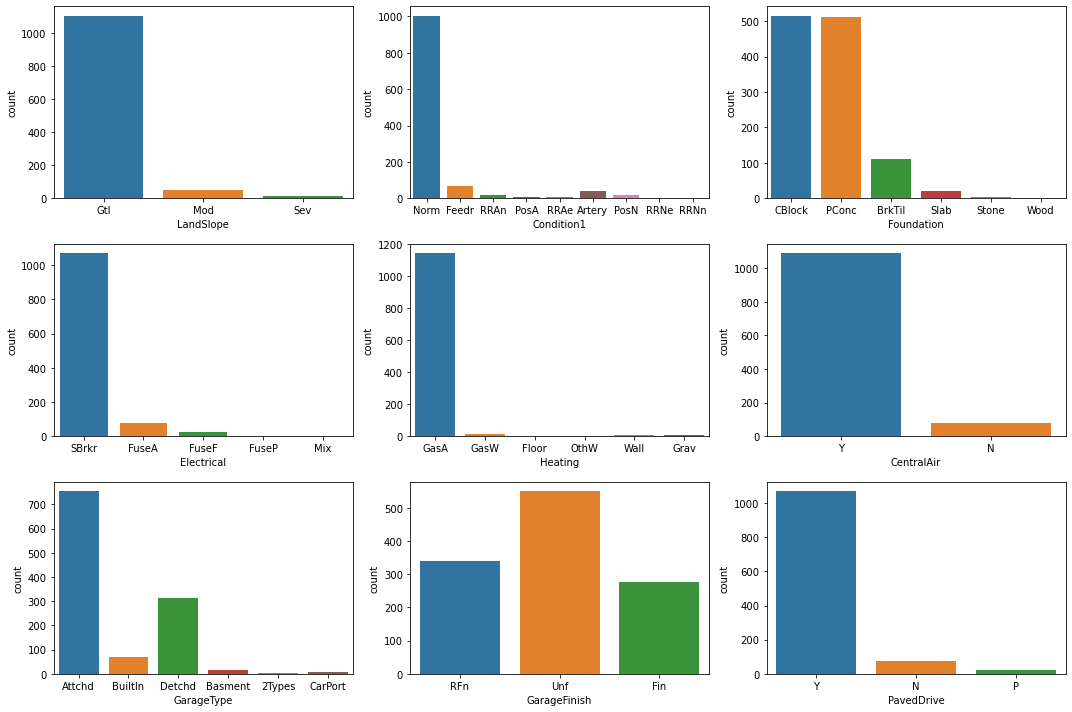

In [30]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
sns.countplot('LandSlope',data=df1,ax=ax[0][0])
sns.countplot('Condition1',data=df1,ax=ax[0][1])
sns.countplot('Foundation',data=df1,ax=ax[0][2])

sns.countplot('Electrical',data=df1,ax=ax[1][0])
sns.countplot('Heating',data=df1,ax=ax[1][1])
sns.countplot('CentralAir',data=df1,ax=ax[1][2])

sns.countplot('GarageType',data=df1,ax=ax[2][0])
sns.countplot('GarageFinish',data=df1,ax=ax[2][1])
sns.countplot('PavedDrive',data=df1,ax=ax[2][2])

plt.tight_layout()

#### Inferences from above plot :

1. Approx 95% properties is located on gentle slope.

2. Mostly properties are adjusted to normal condition.

3. Mostly foundation of properties is done by cinder block & poured concrete.

4. Standard Circuit Breakers & Romex electrical system is widely used for houses. 

5. Almost all have GasA (Gas forced warm air furnace) type of heating in their houses.

6. Approx 93% houses have central air conditioning setup.

7. Approx 65% houses have garage attached to their houses.

8. Mostly houses garage interior finishing is not done.

9. Approx 92% houses have paved driveway to their mansion.

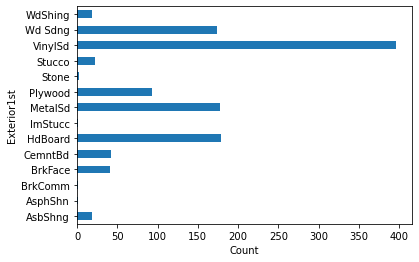

In [31]:
df1.groupby('Exterior1st')['Exterior1st'].count().plot(kind='barh')
plt.xlabel('Count')
plt.show()

#### Mostly Vinyl Siding have been installed to cover exterior of their houses.

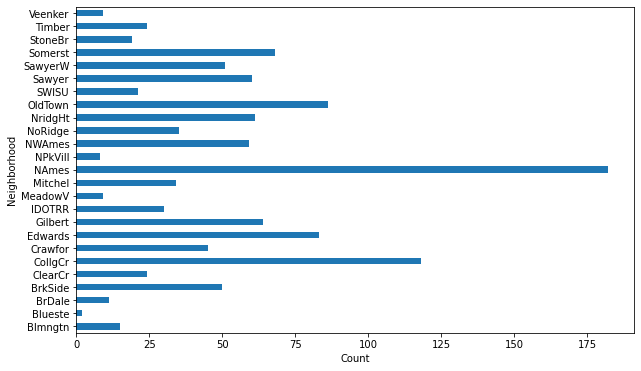

In [32]:
plt.subplots(figsize=(10,6))
df1.groupby('Neighborhood')['Neighborhood'].count().plot(kind='barh')
plt.xlabel('Count')
plt.show()

#### Mostly properties are located nearby Northwest Ames.

## Bivariate Analysis

Text(0.5, 0, 'Exterior covering on house')

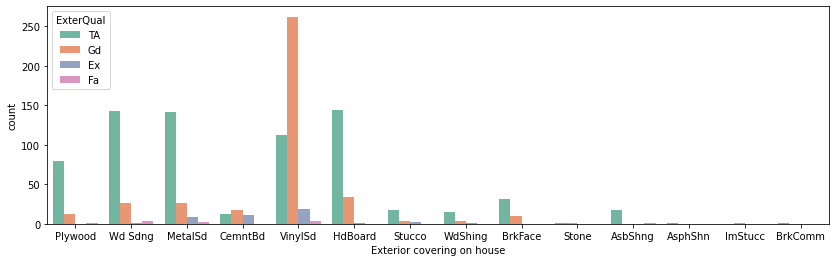

In [33]:
plt.subplots(figsize=(14,4))
sns.countplot(x='Exterior1st',hue='ExterQual', data=df1,palette='Set2')
plt.xlabel('Exterior covering on house')

#### In terms of quality Vinyl Siding is the best among all materials used for exterior covering of houses.

Text(0.5, 0, 'Type of Dwelling')

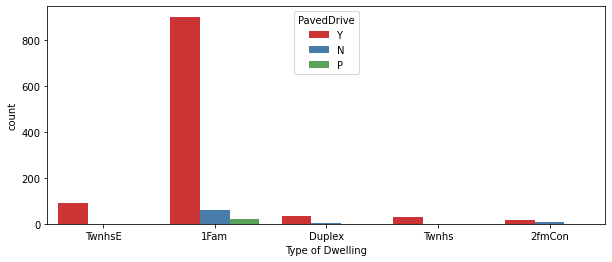

In [34]:
plt.subplots(figsize=(10,4))
sns.countplot(x='BldgType',hue='PavedDrive', data=df1,palette='Set1')
plt.xlabel('Type of Dwelling')

#### Mostly all type of houses have their driveway paved only.  

Text(0.5, 0, 'Properties Selling Year')

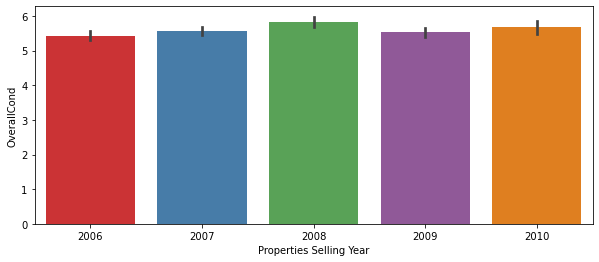

In [35]:
plt.subplots(figsize=(10,4))
sns.barplot(x='YrSold',y='OverallCond', data=df1,palette='Set1')
plt.xlabel('Properties Selling Year')

#### The overall condition of properties when sold was mostly average.

## Visualizing Variables vs Target Variable (Saleprice)

Text(0.5, 0, 'Type of Dwelling')

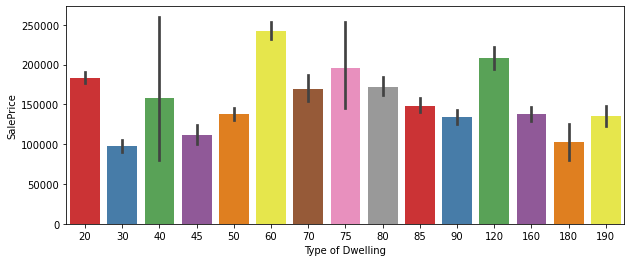

In [36]:
plt.subplots(figsize=(10,4))
sns.barplot(x='MSSubClass', y='SalePrice',data=df1, palette='Set1')
plt.xlabel('Type of Dwelling')

#### 2-STORY 1946 & NEWER type of houses saleprice is maximum than others. 

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

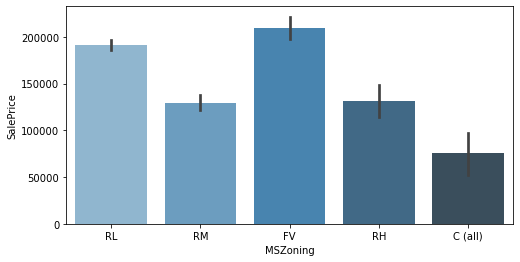

In [37]:
plt.subplots(figsize=(8,4))
sns.barplot(x='MSZoning', y='SalePrice',data=df1, palette='Blues_d')

#### Floating Village & Low Density Residential houses saleprice is most than others.

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

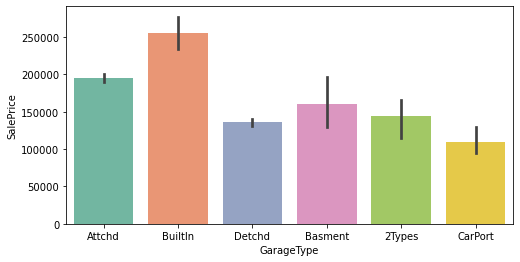

In [38]:
plt.subplots(figsize=(8,4))
sns.barplot(x='GarageType', y='SalePrice',data=df1, palette='Set2')

#### Saleprice of those houses are high which has Built-In (Garage part of house - typically has room above garage).

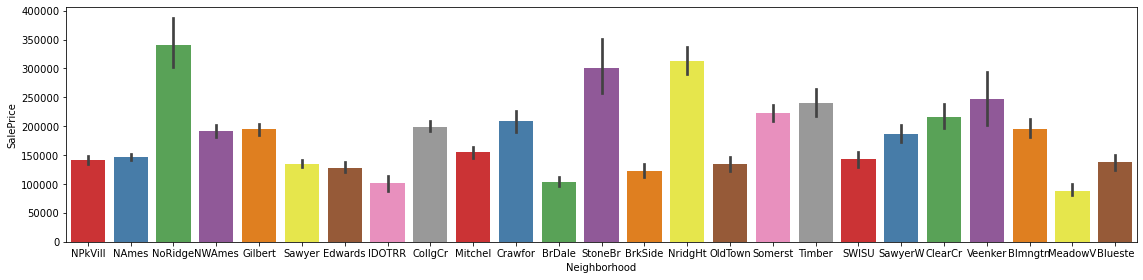

In [39]:
plt.subplots(figsize=(16,4))
sns.barplot(x='Neighborhood', y='SalePrice',data=df1, palette='Set1')
plt.tight_layout()

1. Saleprice of properties located nearby North Ridge is very high.
2. Saleprice of properties located nearby Meadow Village is least.

Text(0.5, 0, 'Exterior covering on house')

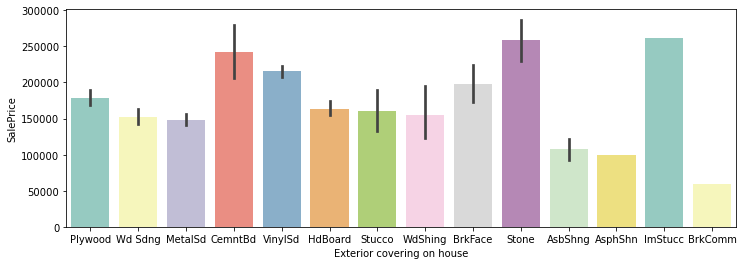

In [40]:
plt.subplots(figsize=(12,4))
sns.barplot(x='Exterior1st', y='SalePrice',data=df1, palette='Set3')
plt.xlabel('Exterior covering on house')

#### Saleprice of properties is high if its exterior covering is done by stone and cement board.

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

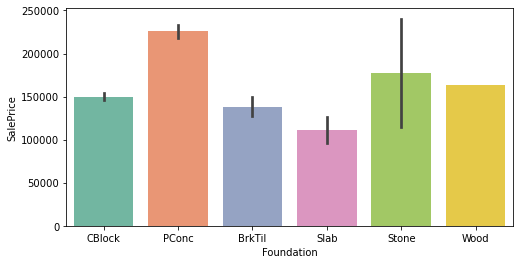

In [41]:
plt.subplots(figsize=(8,4))
sns.barplot(x='Foundation', y='SalePrice',data=df1, palette='Set2')

#### Those houses whose foundation is built by poured concrete has maximum saleprice than others.

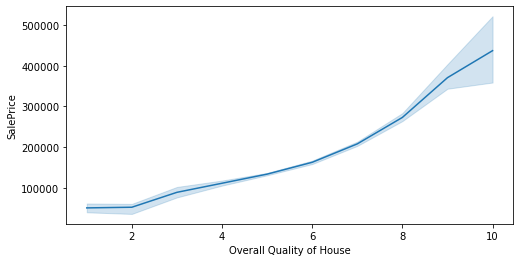

In [42]:
plt.figure(figsize=(8,4))
sns.lineplot(x='OverallQual',y='SalePrice',data=df1)
plt.xlabel('Overall Quality of House')
plt.show()

#### Saleprice of house increases with increase in overall rating for material and finish of the house.

Text(0.5, 0, 'Type of Dwelling')

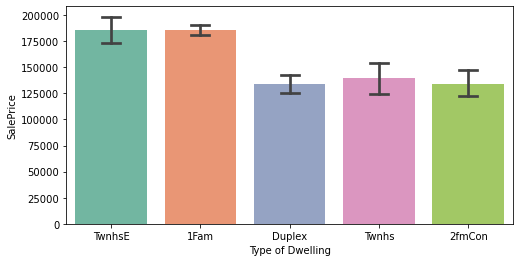

In [43]:
plt.subplots(figsize=(8,4))
sns.barplot(x='BldgType', y='SalePrice',data=df1, palette='Set2',capsize=.2)
plt.xlabel('Type of Dwelling')

#### Single family house & Townhouse End Unit types of properties saleprice is much higher than other type of dwellings.

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

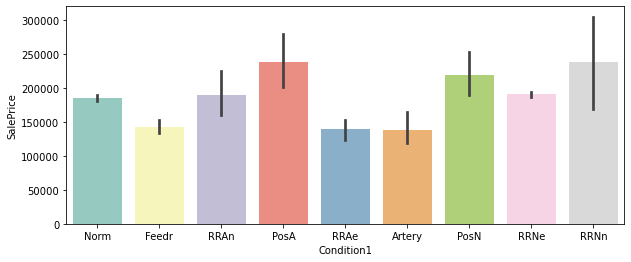

In [44]:
plt.subplots(figsize=(10,4))
sns.barplot(x='Condition1', y='SalePrice',data=df1, palette='Set3')

#### Saleprice of properties is high if located Within 200' of North-South Railroad and also Adjacent or near to postive off-site feature like park,greenbelt etc.

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

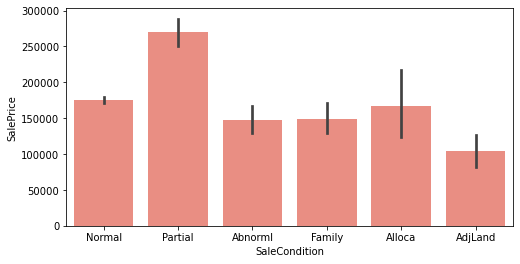

In [45]:
plt.subplots(figsize=(8,4))
sns.barplot(x='SaleCondition', y='SalePrice',data=df1, color='salmon')

#### The saleprice of Partial houses which was not completed when last assessed (associated with New Homes) is maximum than others. 

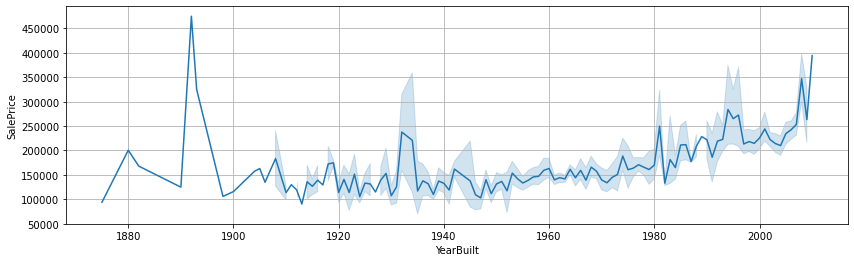

In [46]:
plt.figure(figsize=(14,4))
sns.lineplot(x='YearBuilt',y='SalePrice',data=df1)
plt.grid()
plt.show()

#### Saleprice of house increases if built year of properties (houses) is less when sold. 

In [47]:
# listing out continous features from train data 
con_features1=[i for i in df1.columns if df1.dtypes[i]=='int64' or df1.dtypes[i]=='float64'] 
con_features1

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'YrSold',
 'SalePrice']

In [48]:
# listing out continous features from test data 
con_features2=[i for i in df2.columns if df2.dtypes[i]=='int64' or df2.dtypes[i]=='float64']
con_features2

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

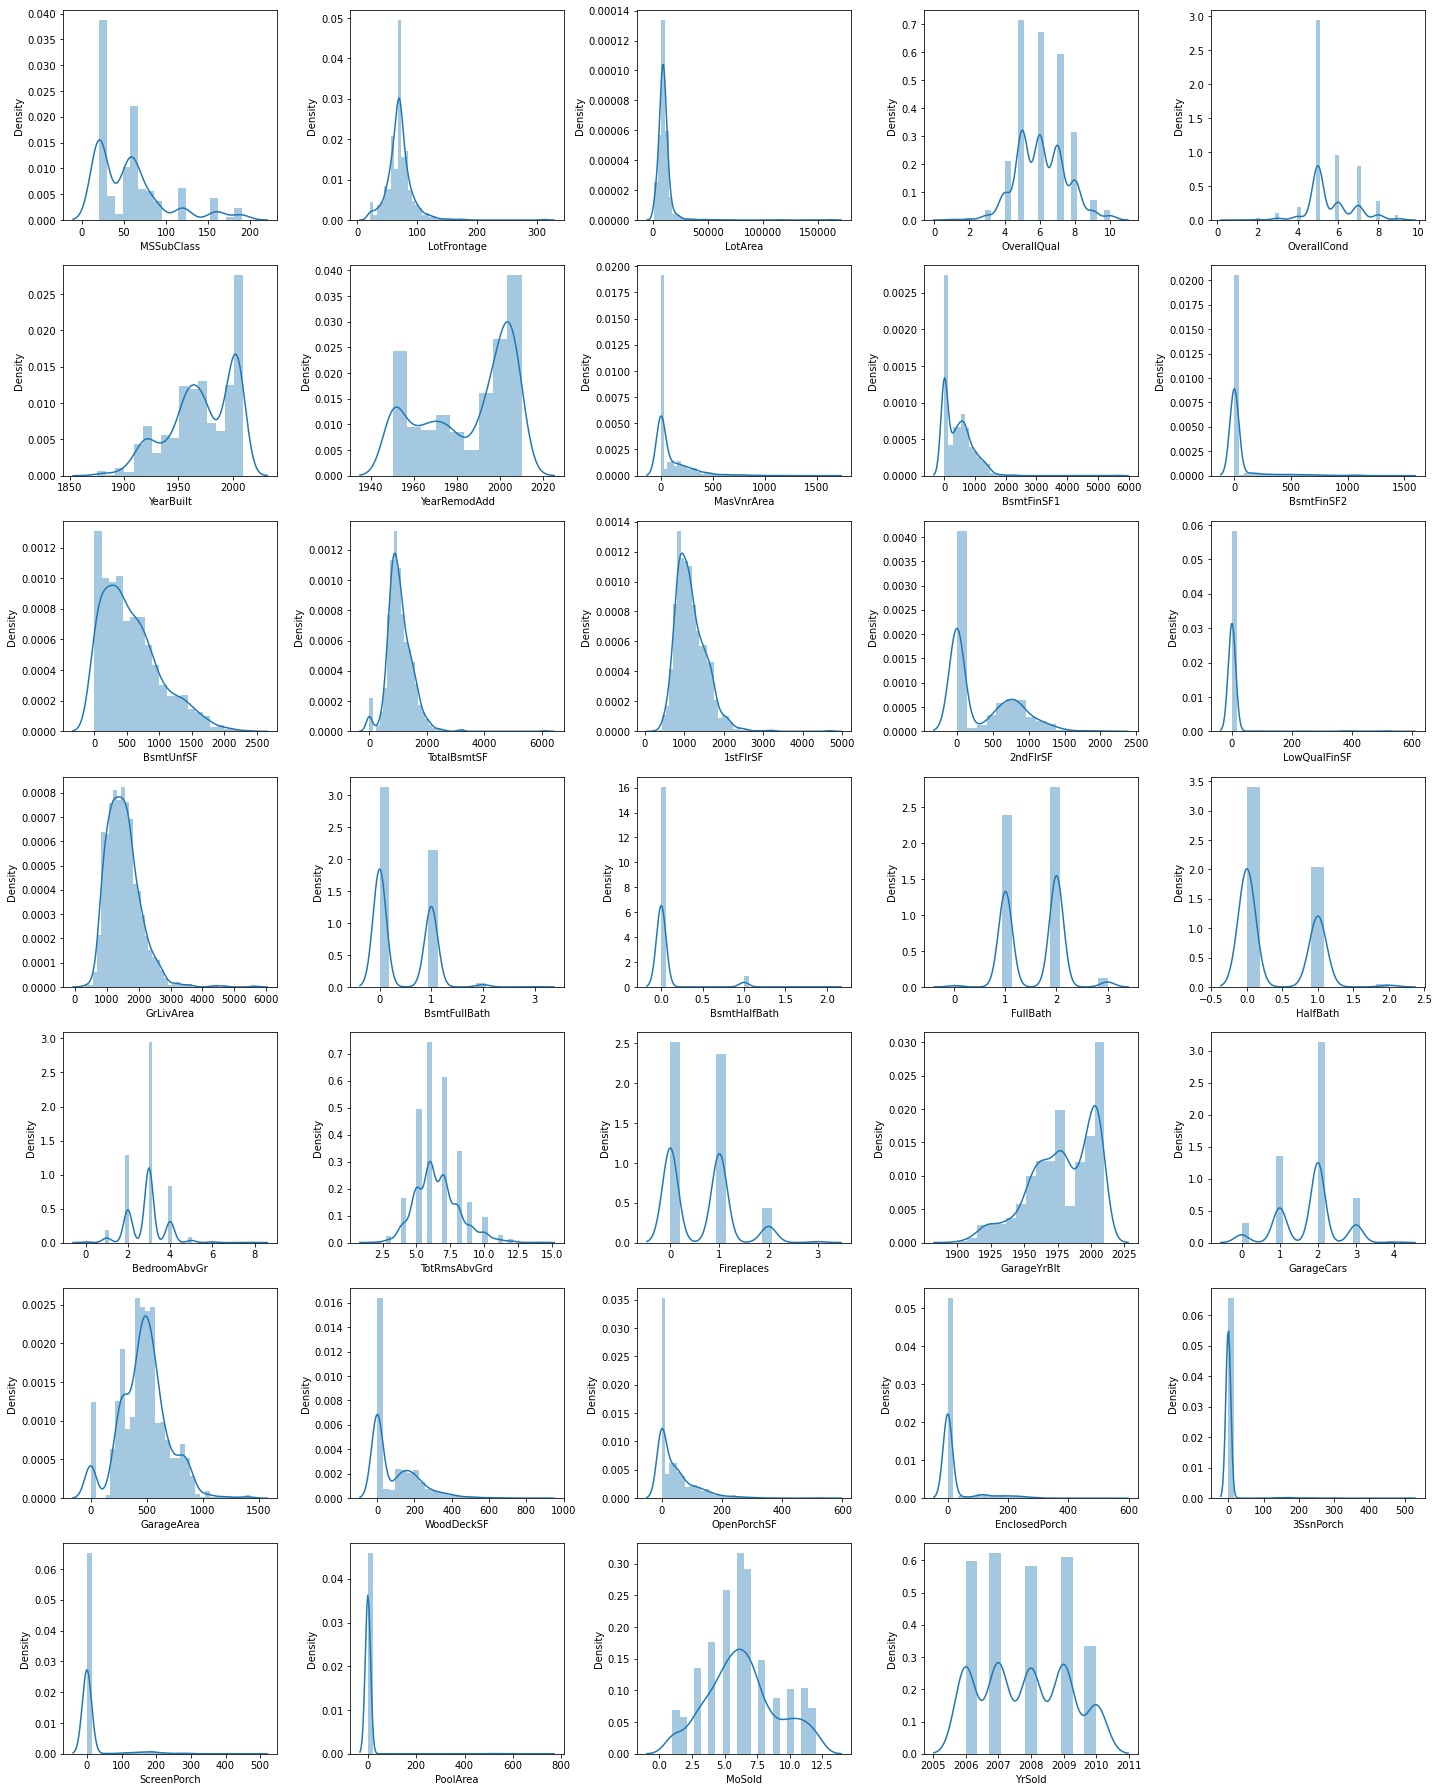

In [49]:
# lets visualize all the columns from train data
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in con_features1:
    if plotnumber<=34:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### Skewness can be seen in variables from train data like LotFrontage,LotArea,WoodDeckSF,OpenPorchSF,GarageArea,GrLivArea,MasVnrArea,BsmtUnfSF,BsmtFinSF1,1stFlrSF,2ndFlrSF,TotalBsmtSF

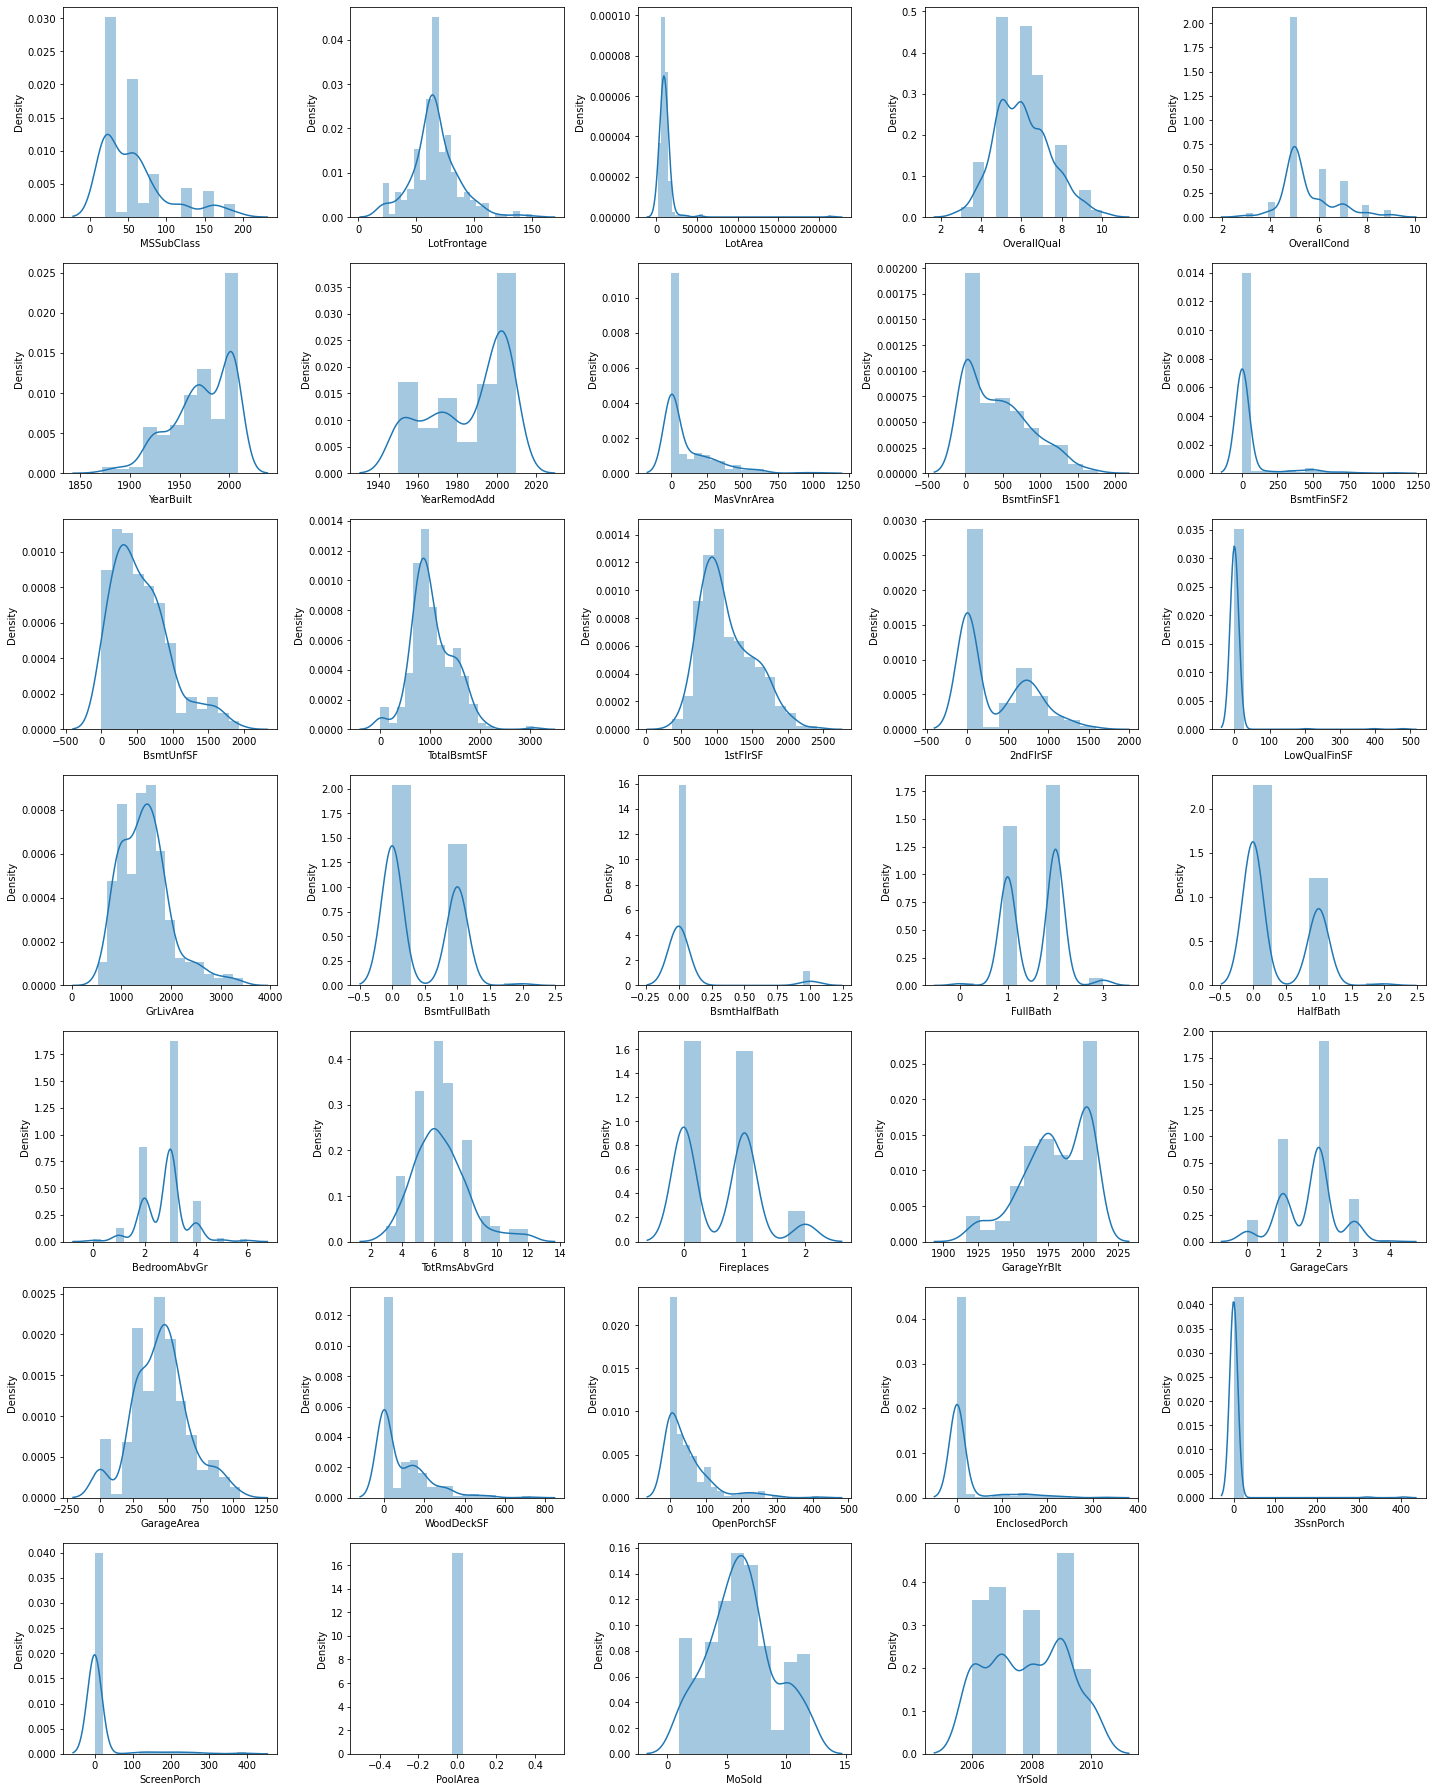

In [50]:
# lets visualize all the columns from test data
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in con_features2:
    if plotnumber<=34:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### Skewness can be seen in variables from test data like LotFrontage,LotArea,WoodDeckSF,OpenPorchSF,GrLivArea,MasVnrArea,BsmtUnfSF,BsmtFinSF1,2ndFlrSF,TotalBsmtSF

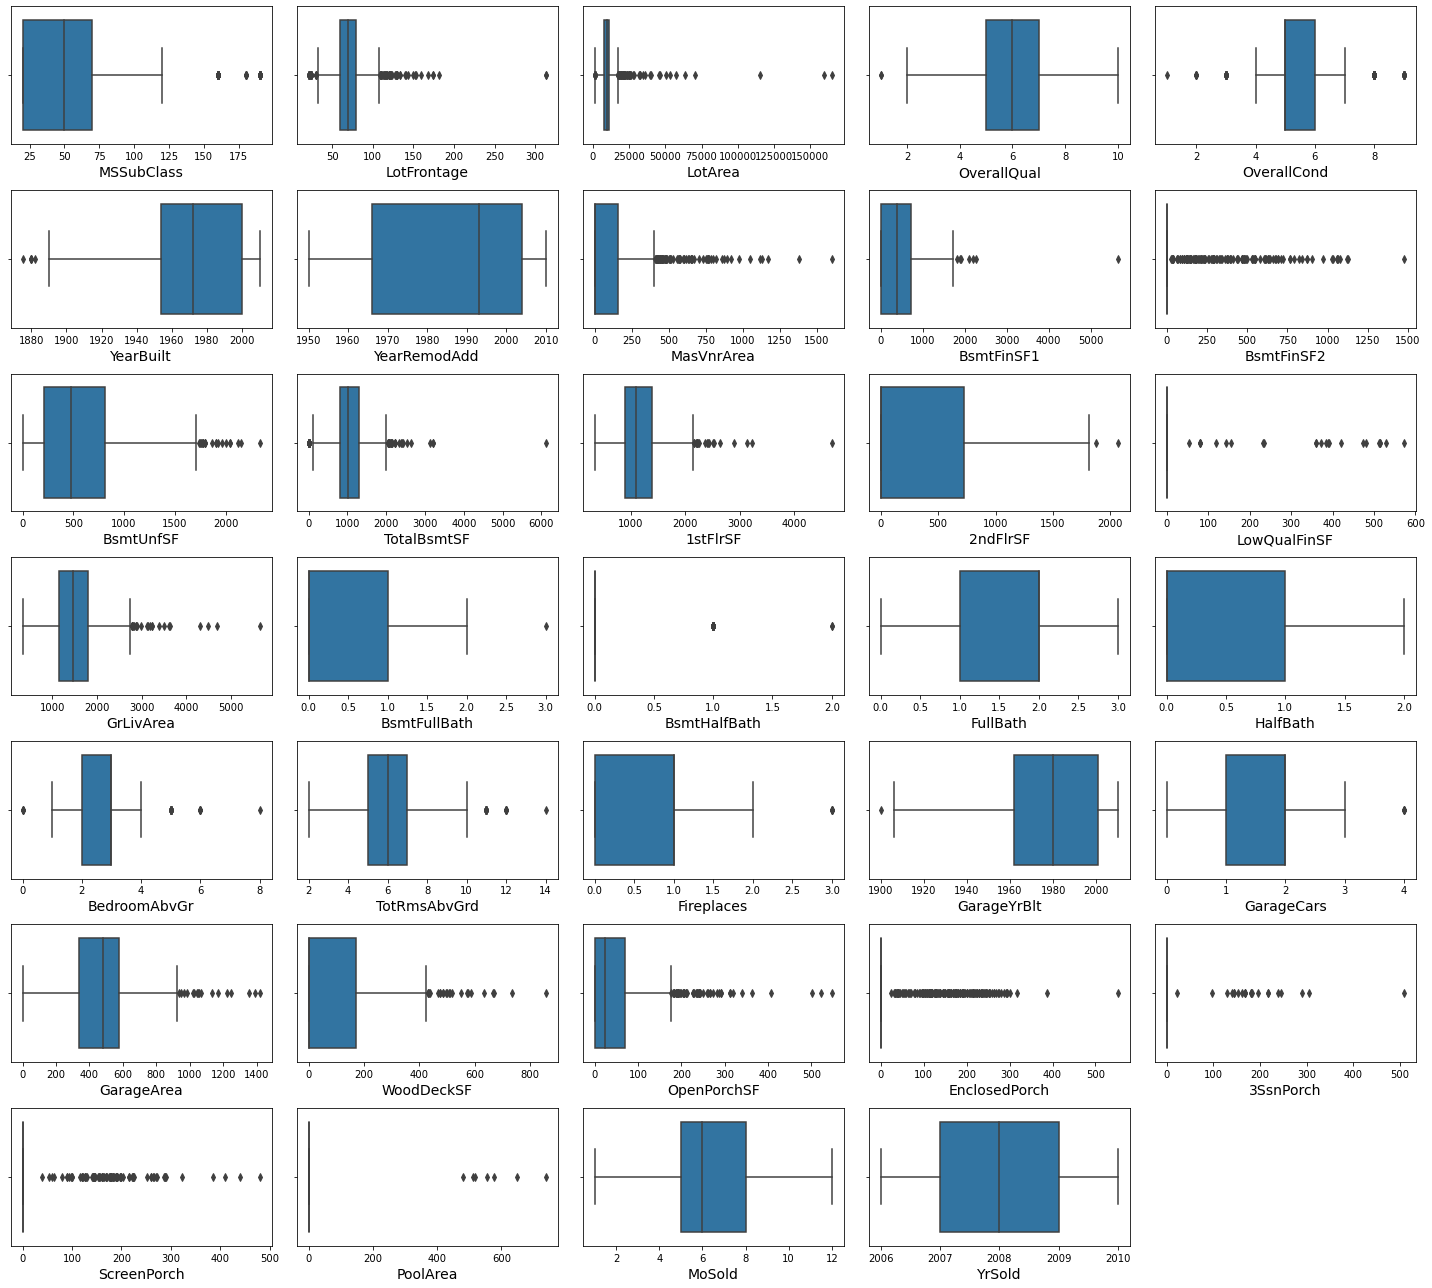

In [51]:
# Lets visualize the columns in boxplot to check outliers for train data
plt.figure(figsize=(20,18))
plotnumber=1
for col in con_features1:
    if plotnumber<=34:
        plt.subplot(7,5,plotnumber)
        sns.boxplot(df1[col])
        plt.xlabel(col,fontsize=14)
        plotnumber=plotnumber+1
plt.tight_layout()

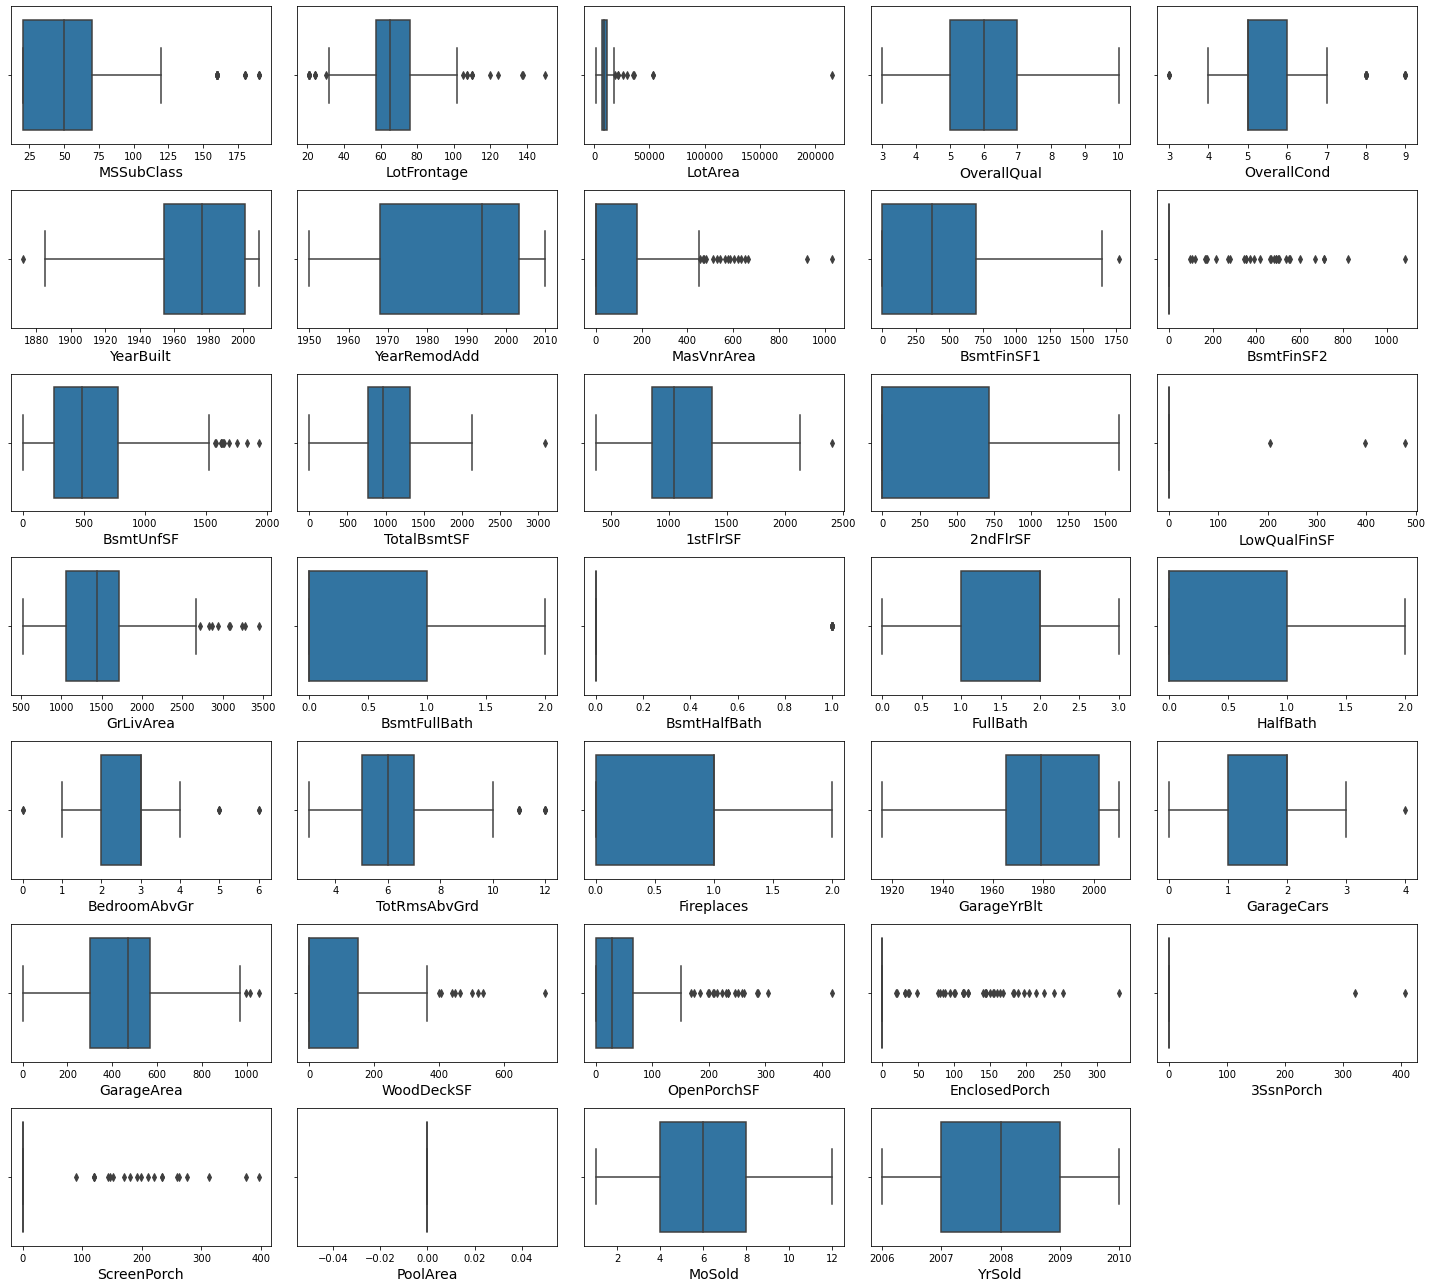

In [52]:
# Lets visualize the columns in boxplot to check outliers for test data
plt.figure(figsize=(20,18))
plotnumber=1
for col in con_features2:
    if plotnumber<=34:
        plt.subplot(7,5,plotnumber)
        sns.boxplot(df2[col])
        plt.xlabel(col,fontsize=14)
        plotnumber=plotnumber+1
plt.tight_layout()

In [53]:
# Using 1.5 IQR method to remove outliers from train data
def outlier(df1,col):
    lower_boundary=df1[col].mean()-1.5*df1[col].std()
    upper_boundary=df1[col].mean()+1.5*df1[col].std()
    print(lower_boundary,upper_boundary)
    df1.loc[df1[col]> upper_boundary,col] = upper_boundary
    df1.loc[df1[col]<lower_boundary,col]=lower_boundary

In [54]:
# Using 1.5 IQR method to remove outliers from test data
def outlier(df2,col):
    lower_boundary=df2[col].mean()-1.5*df2[col].std()
    upper_boundary=df2[col].mean()+1.5*df2[col].std()
    print(lower_boundary,upper_boundary)
    df2.loc[df2[col]> upper_boundary,col] = upper_boundary
    df2.loc[df2[col]<lower_boundary,col]=lower_boundary

In [55]:
outlier(df1,'MSSubClass')
outlier(df1,'LotArea')
outlier(df1,'GrLivArea')
outlier(df1,'OpenPorchSF')
outlier(df1,'LotFrontage')
outlier(df1,'TotRmsAbvGrd')
outlier(df1,'MasVnrArea')
outlier(df1,'1stFlrSF')
outlier(df1,'2ndFlrSF')
outlier(df1,'BsmtFinSF1')
outlier(df1,'BsmtUnfSF')
outlier(df1,'GarageArea')
outlier(df1,'GrLivArea')
outlier(df1,'WoodDeckSF')
outlier(df1,'TotalBsmtSF')

-6.1429951428622545 119.67895404697185
-2951.414322272558 23920.91260994379
733.002344722184 2317.1312169216517
-53.011603713868205 146.13146672756685
37.14688744214376 104.4678385852535
4.145082919803316 8.940533518552847
-171.63080685318502 375.02464246962336
583.1174708396358 1756.6034195713232
-310.7183563640473 1008.3707536243213
-249.27114954997785 1138.7232043444983
-104.34154030437935 1243.7850334550642
155.16029146160275 798.5605989493561
838.7249422229761 2153.3541518761554
-93.03214611688433 285.444817349761
397.6866603653509 1724.5034081277997


In [56]:
outlier(df2,'MSSubClass')
outlier(df2,'LotArea')
outlier(df2,'GrLivArea')
outlier(df2,'OpenPorchSF')
outlier(df2,'LotFrontage')
outlier(df2,'TotRmsAbvGrd')
outlier(df2,'MasVnrArea')
outlier(df2,'BsmtUnfSF')
outlier(df2,'GarageArea')
outlier(df2,'GrLivArea')
outlier(df2,'WoodDeckSF')
outlier(df2,'TotalBsmtSF')

-8.256589854316722 123.08535697760439
-9350.860856808396 30641.148528041274
705.752227017972 2248.3505127080552
-51.7365294752767 145.85981714650956
36.2315640869234 96.17939481718618
3.825650045100903 9.009966393255262
-153.47073164413405 371.0666220550929
-59.25058390257334 1173.8807208888747
141.28051781448642 773.6372904046916
804.9387004281992 2081.460451488302
-96.45099347918487 269.24551402713007
405.9253942301723 1679.6088523451701


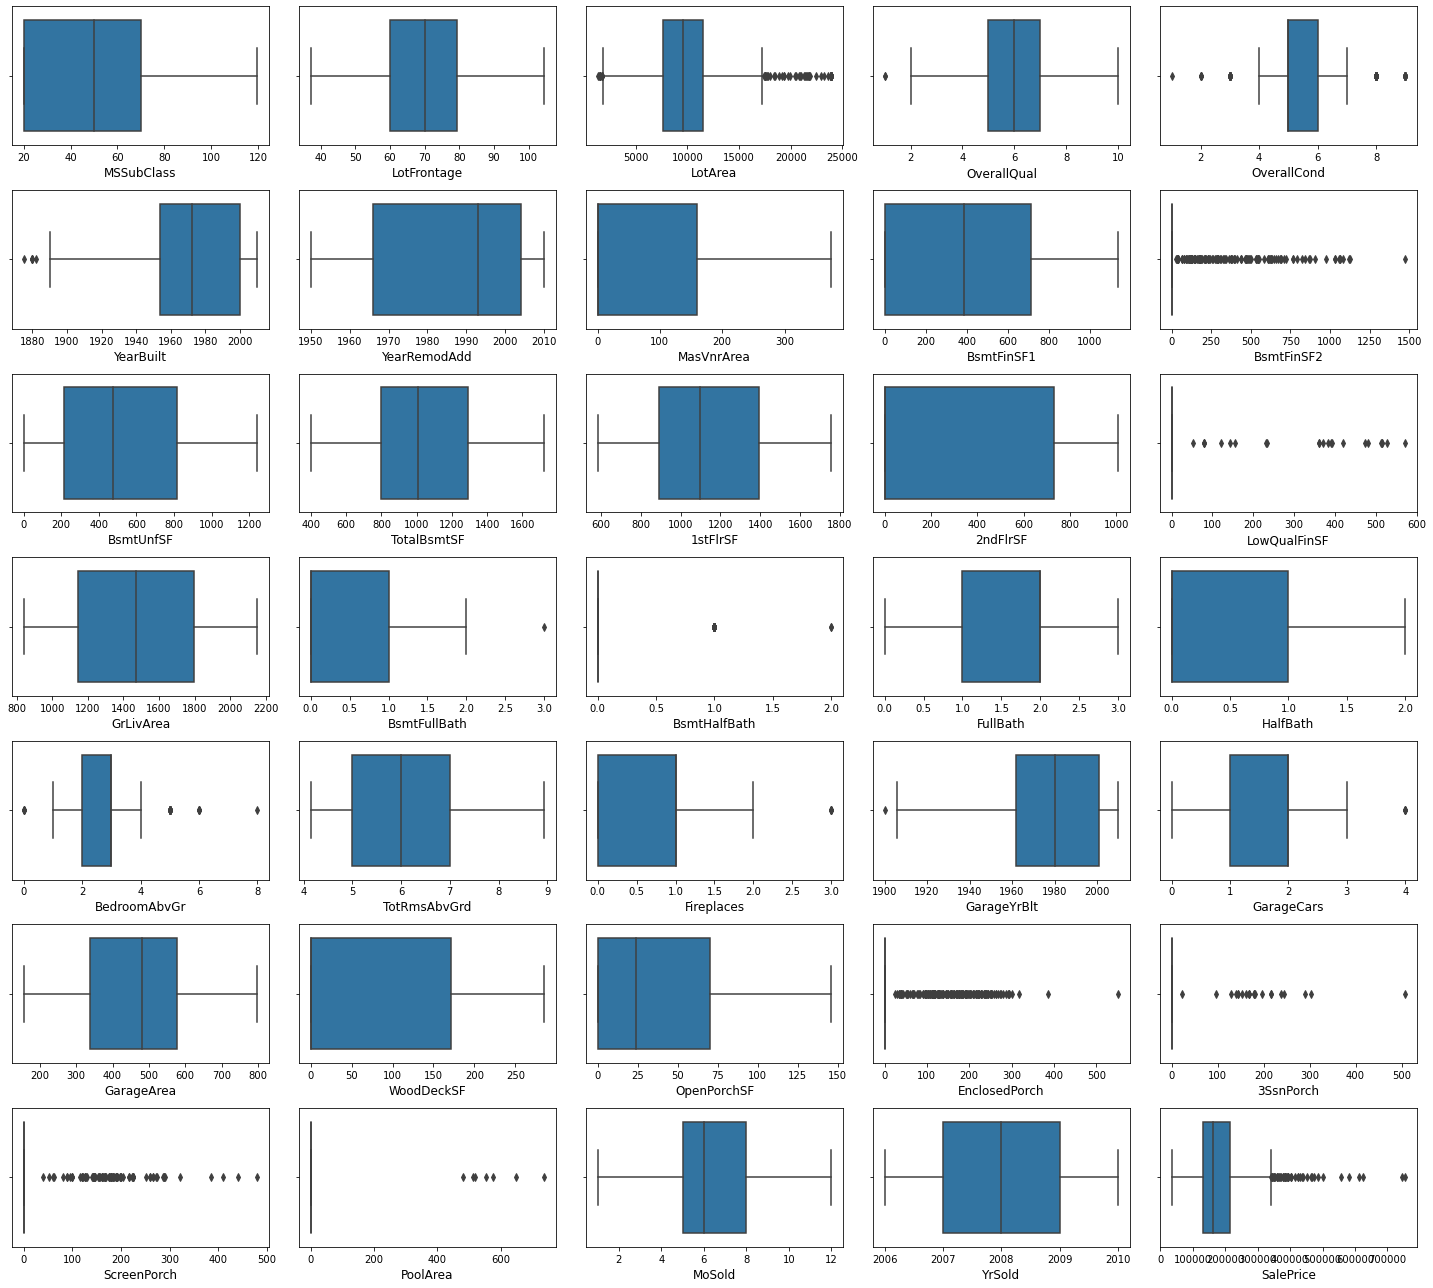

In [57]:
# Again visualizing through boxplot after removing outliers for train data
plt.figure(figsize=(20,18))
plot=1
for col in con_features1:
    if plot<=35:
        plt.subplot(7,5,plot)
        sns.boxplot(df1[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

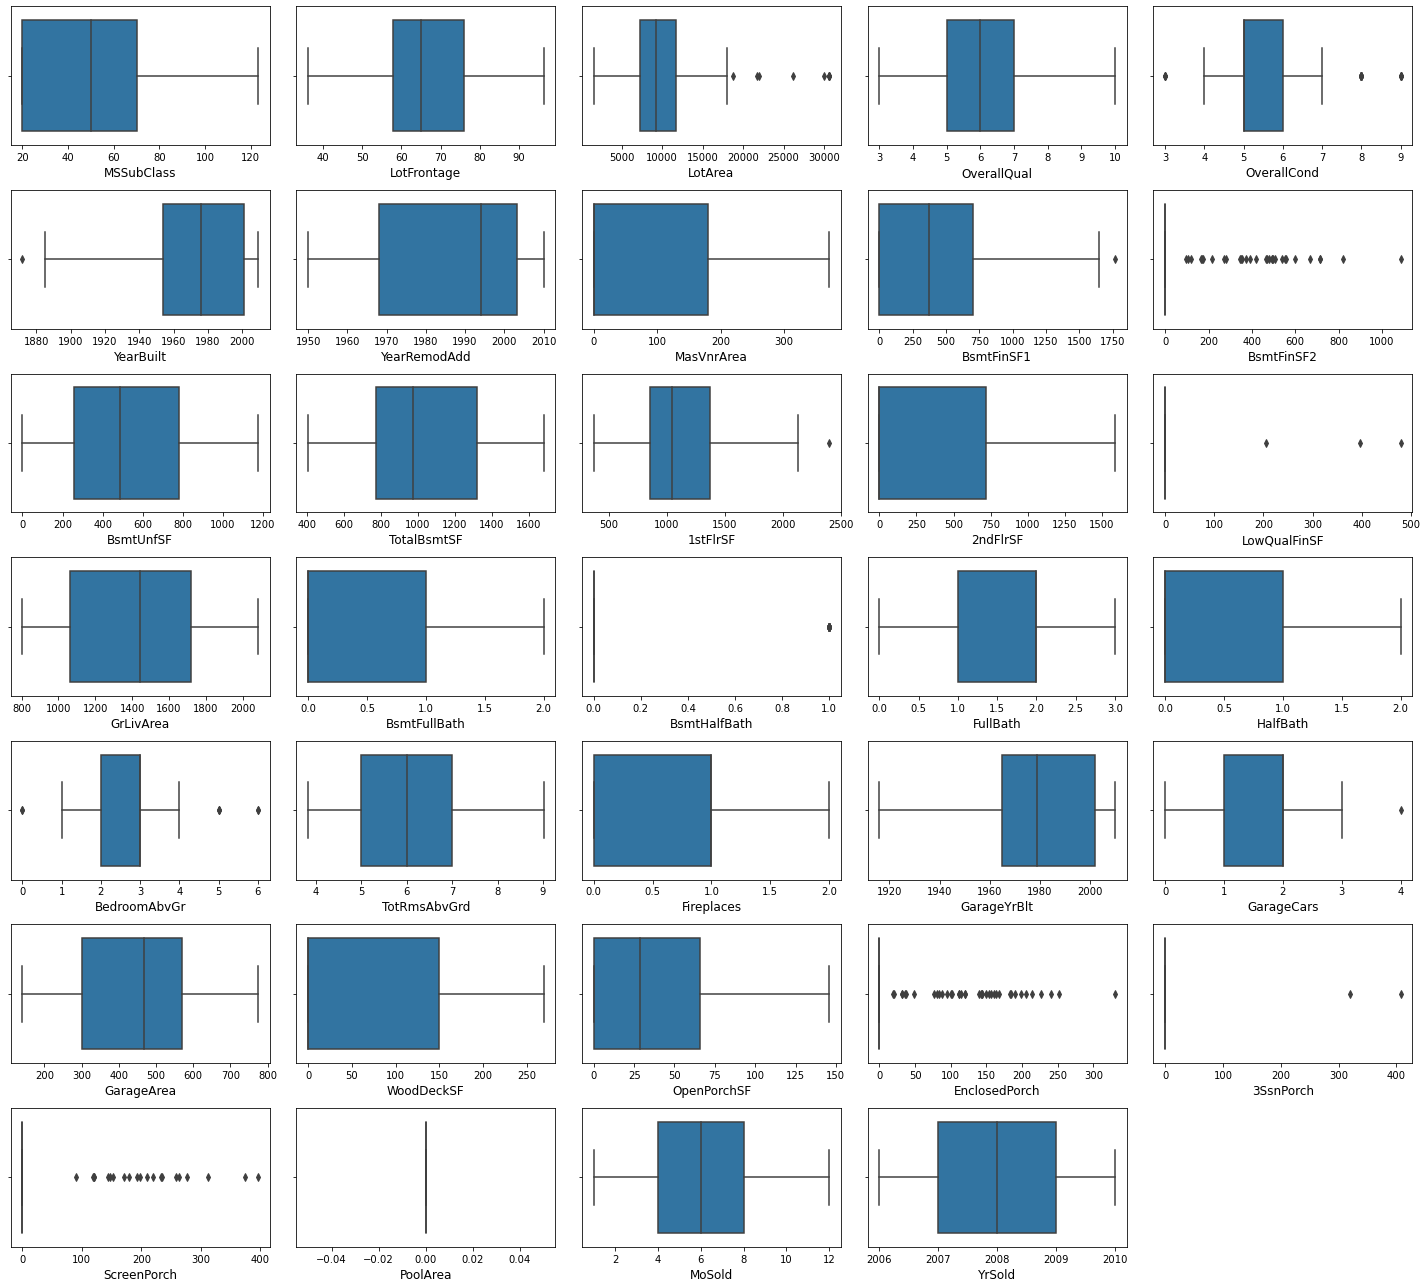

In [58]:
# Again visualizing through boxplot after removing outliers for test data
plt.figure(figsize=(20,18))
plot=1
for col in con_features2:
    if plot<=34:
        plt.subplot(7,5,plot)
        sns.boxplot(df2[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

In [59]:
# to see skewness for each column for train data
df1.skew()

MSSubClass        0.718020
LotFrontage       0.119630
LotArea           1.050581
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        1.233294
BsmtFinSF1        0.415443
BsmtFinSF2        4.365829
BsmtUnfSF         0.407663
TotalBsmtSF       0.312311
1stFlrSF          0.359871
2ndFlrSF          0.554700
LowQualFinSF      8.666142
GrLivArea         0.148798
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
TotRmsAbvGrd      0.207602
Fireplaces        0.671966
GarageYrBlt      -0.674913
GarageCars       -0.358556
GarageArea        0.082963
WoodDeckSF        0.672110
OpenPorchSF       0.965807
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
dtype: float64

In [60]:
# to see skewness for each column for test data
df2.skew()

MSSubClass        0.784071
LotFrontage       0.089377
LotArea           1.728071
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.073505
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.345262
TotalBsmtSF       0.336669
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         0.046971
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
TotRmsAbvGrd      0.172578
Fireplaces        0.540164
GarageYrBlt      -0.677213
GarageCars       -0.280324
GarageArea        0.107432
WoodDeckSF        0.813541
OpenPorchSF       0.976785
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [61]:
#Label Encoding for object to numeric conversion for train data
lab_enc = LabelEncoder()
objList = df1.select_dtypes(include = "object").columns
for var in objList:
    df1[var] = lab_enc.fit_transform(df1[var].astype(str))

In [62]:
#Label Encoding for object to numeric conversion for test data
lab_enc = LabelEncoder()
objList = df2.select_dtypes(include = "object").columns
for var in objList:
    df2[var] = lab_enc.fit_transform(df2[var].astype(str))

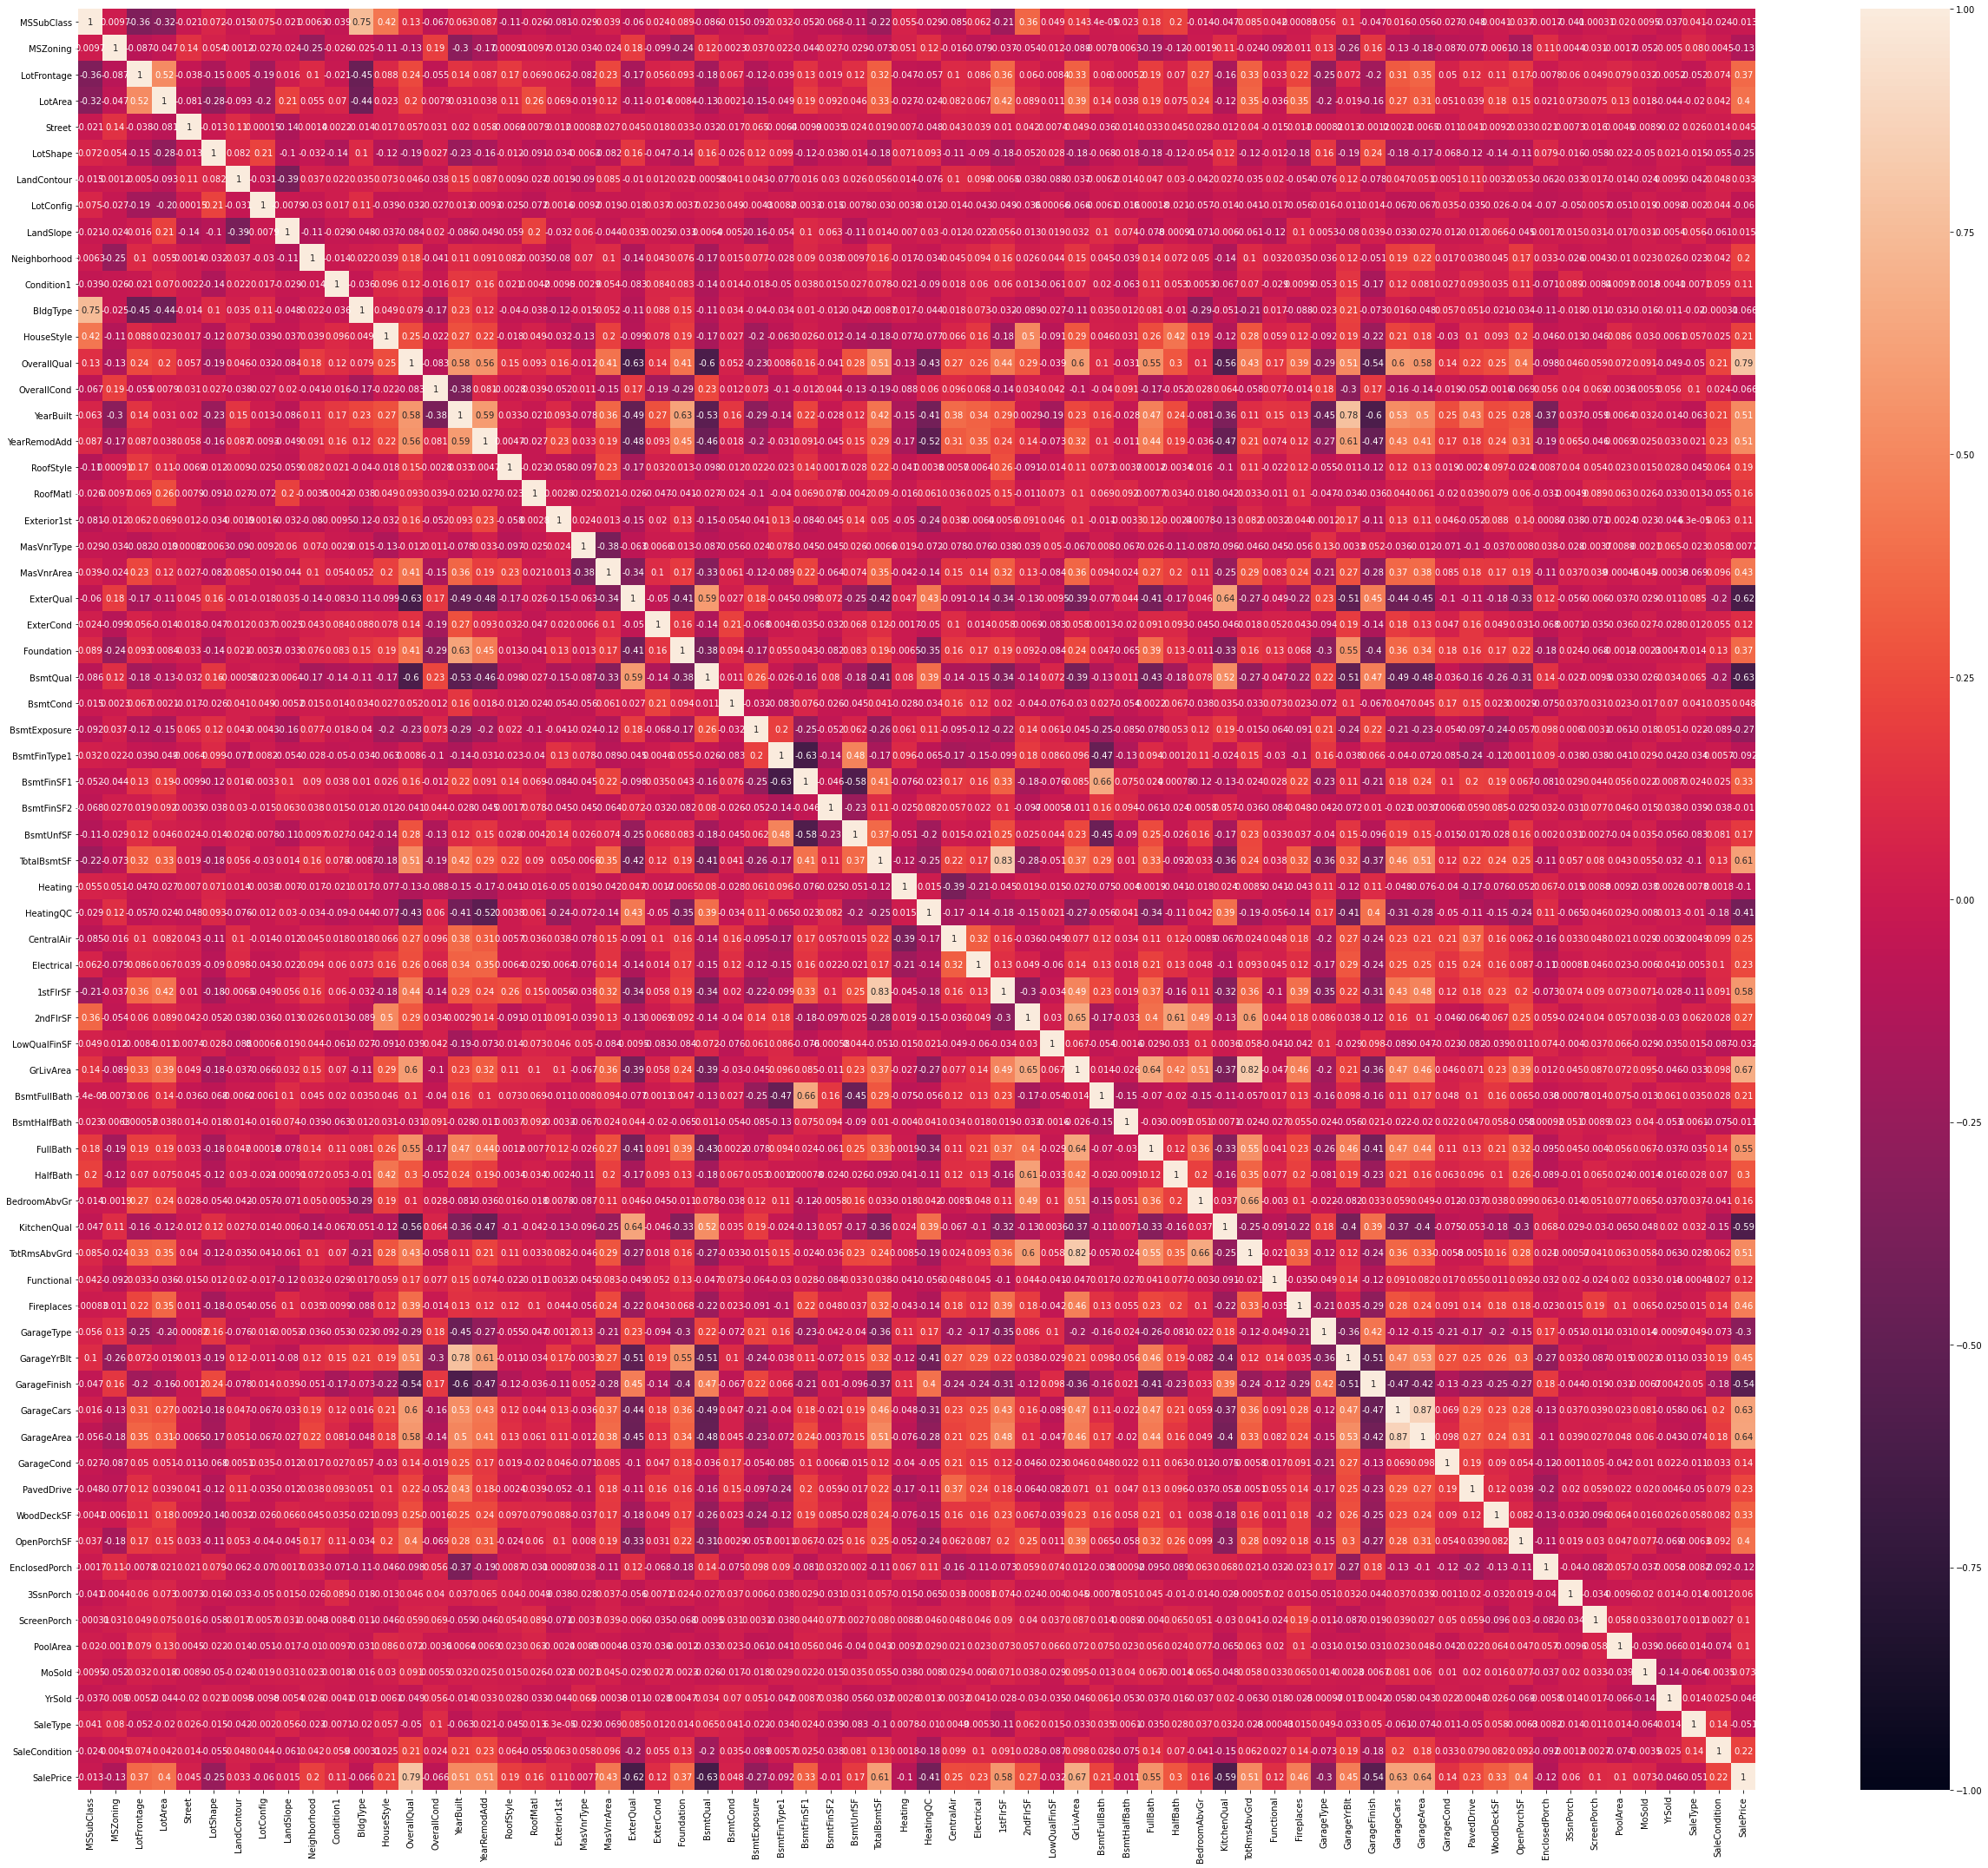

In [63]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(35,30))
sns.heatmap(df1.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.tight_layout()

1. Variables like OverallQual,TotalBsmtSF,GarageCars,GarageArea and GrLivArea has good +ve correlation with target variable.
2. Variables like ExterQual,BsmtQual,KitchenQual and GarageFinish has -ve correlation with target variable.

In [64]:
y = df1['SalePrice']
X = df1.drop('SalePrice', axis = 1)

In [65]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,6.413764,MSSubClass
1,1.353714,MSZoning
2,1.953333,LotFrontage
3,2.229734,LotArea
4,1.103900,Street
...,...,...
62,1.116002,PoolArea
63,1.083526,MoSold
64,1.091826,YrSold
65,1.115853,SaleType


#### Multicollinearity problem exists.

In [67]:
# dropping columns to avoid multicollinearity problem, but keeping important variables
df1=df1.drop(columns=['1stFlrSF','2ndFlrSF','BsmtUnfSF'])

In [68]:
# importing libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [69]:
# Split train data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 51)

In [70]:
y_train.head()

753    181000
19     106000
65     350000
54      84900
221    115000
Name: SalePrice, dtype: int64

In [71]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [72]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.8297300595262376

In [73]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.8517763335293578

In [74]:
# To cross verify
y_pred = regression.predict(x_test)

In [75]:
r2_score(y_test,y_pred)

0.8517763335293578

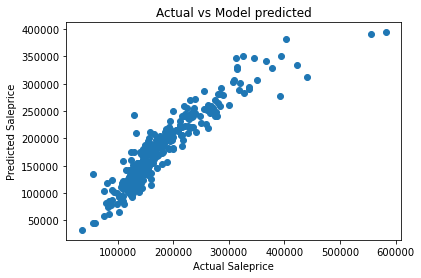

In [76]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Saleprice')
plt.ylabel('Predicted Saleprice')
plt.title('Actual vs Model predicted')
plt.show()

In [77]:
mean_absolute_error(y_test,y_pred)

19868.06262861514

In [78]:
mean_squared_error(y_test,y_pred)

856236220.5958905

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred))

29261.5143250634

In [80]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(regression,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79625597 0.78826913 0.70581771 0.85215029 0.8373508 ]
0.7959687802743318
0.0510987584943682


## Using Regularization method to check whether our regression model is overfitting or not

In [81]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

## Lasso Regularization

In [82]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [83]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

212.52951060225772

In [84]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=212.52951060225772)

In [85]:
lasso_reg.score(x_test,y_test)

0.8510248756649721

## Using Ridge regression model

In [86]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [87]:
ridgecv.alpha_

0.09099999999999998

In [88]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [89]:
ridge_model.score(x_test,y_test)

0.8517739026916529

#### So we can see by using different type of regularization,we still are getting almost same r2 score. That means our linear regression model has been well trained over the training data and there is no overfitting.

## DecisionTree Regressor

In [90]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {dt_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = dt_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {dt_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________

===================Test Result======================
Accuracy Score: 68.83%
______________________________________________


In [91]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.5740092  0.66764222 0.67523733 0.61830868 0.63895108]
0.6348297036191217
0.03660191681450836


## Random Forest Regressor

In [92]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=101)
rand_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {rand_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = rand_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {rand_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 97.67%
______________________________________________

===================Test Result======================
Accuracy Score: 87.59%
______________________________________________


In [93]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.89060351 0.81301059 0.80870063 0.87696761 0.82597711]
0.8430518905606748
0.03401608418937007


## KNN Regressor

In [94]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {knn.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = knn.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {knn.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 83.17%
______________________________________________

===================Test Result======================
Accuracy Score: 73.31%
______________________________________________


In [95]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.57899636 0.75698167 0.64276749 0.71617295 0.74005229]
0.6869941543956379
0.06660982054814817


## Gradient Boosting Regressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_preds = gbr.predict(x_test)
y_preds

gbr.score(x_test, y_test)

0.8983302039911487

In [97]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbr,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8750816  0.78097175 0.83693668 0.88812967 0.8600483 ]
0.8482335989682275
0.03769317066167312


## XGBRegressor

In [98]:
from xgboost.sklearn import XGBRegressor
np.random.seed(42)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

xgb.score(x_test,y_test)

0.8516376036604327

In [99]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(xgb,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.89482137 0.80213035 0.86173602 0.87801012 0.82841458]
0.8530224874495416
0.03359468066534079


In [105]:
accuracy =[85.17,68.83,87.59,73.31,89.83,85.16]
cross_val_score=[79.59,63.48,84.30,68.69,84.82,85.30]

model=['Linear Regression','Decision Tree','Random Forest','KNN','Gradient','XGBoost']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Linear Regression,85.17,79.59
1,Decision Tree,68.83,63.48
2,Random Forest,87.59,84.30
3,KNN,73.31,68.69
4,Gradient,89.83,84.82
5,XGBoost,85.16,85.30


In [106]:
# XGBRegressor is our best model because the difference between its accuracy and CV score is least among other models.

## Using GridSearchCV for hyper parameter tuning on best model (XGBRegressor)

In [107]:
grid_param =  { 'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
              }

In [108]:
grid_search = GridSearchCV(estimator=xgb,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [109]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [110]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [111]:
xgb = XGBRegressor(colsample_bytree =0.7, learning_rate= 0.1, max_depth= 5, min_child_weight= 1, n_estimators= 200, 
                    objective= 'reg:squarederror',subsample= 0.7)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
xgb.score(x_test,y_test)

0.900383873380159

In [113]:
# After applying hyper parameter tuning accuracy increased by 4.87%.

## Model Saving

In [114]:
# saving the model to local system
filename = 'Housing_price_prediction.pickle'
pickle.dump(xgb,open(filename,'wb'))

In [115]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
test_pred=loaded_model.predict(df2.values)

In [116]:
# Saving the prediction file
df2['Properties_saleprice'] = test_pred
df2.to_csv('submit_file.csv',index=False)